In [1]:
from signals.Signal import SineSignal
import numpy as np
import matplotlib.pyplot as plt
from transformations.Clarke import clark
import ffmpeg

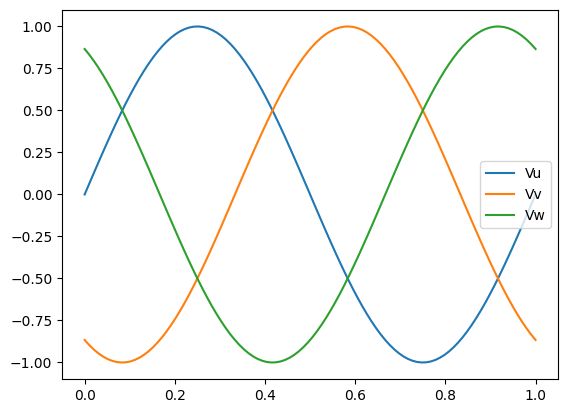

In [2]:
t = np.linspace(0,1,100)

Vu = SineSignal(time=t)
Vv = SineSignal(phi=-120,time=t)
Vw = SineSignal(phi=+120, time=t)

plt.plot(t,Vu.out,t,Vv.out,t,Vw.out)
plt.legend(["Vu","Vv","Vw"])

Text(0.5, 1.0, 'Alpha beta gamma axis reference')

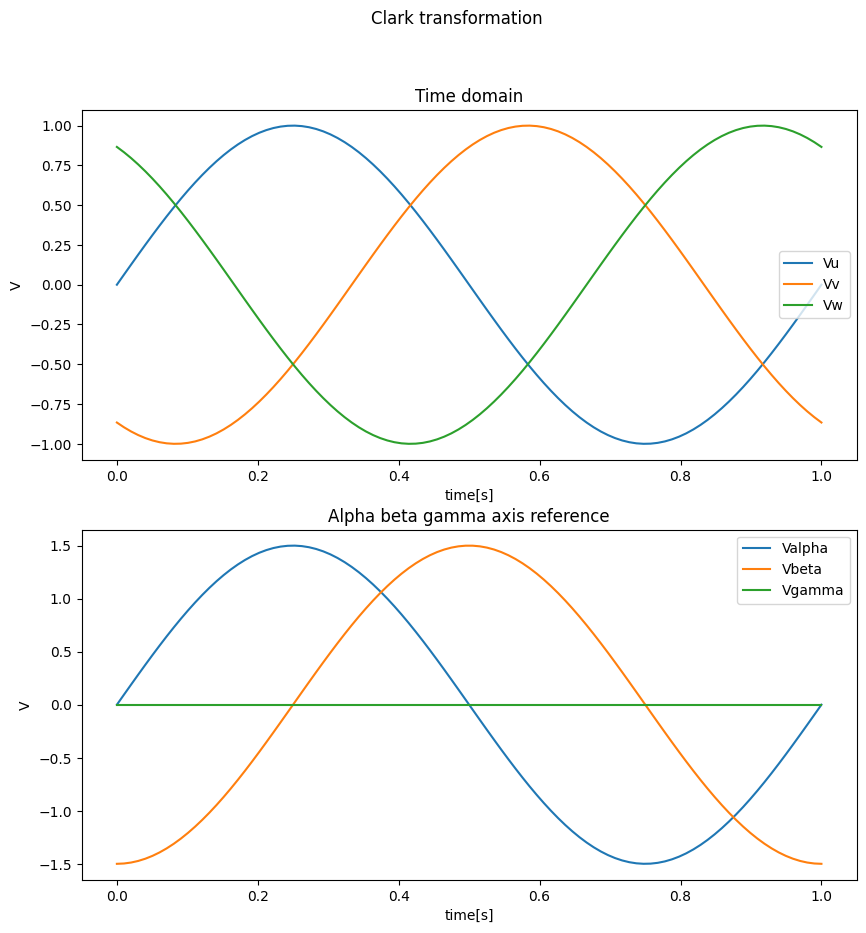

In [3]:
fig,axs = plt.subplots(2, figsize=(10,10))
fig.suptitle("Clark transformation")
axs[0].plot(t,Vu.out,t,Vv.out,t,Vw.out)
axs[0].set_xlabel("time[s]")
axs[0].set_ylabel("V")
axs[0].legend(["Vu","Vv","Vw"])
axs[0].set_title("Time domain")

clark_transformed = clark(np.matrix([Vu.out, Vv.out, Vw.out]))
alpha, beta, gamma = clark(np.matrix([Vu.out, Vv.out, Vw.out]))

axs[1].plot(t, alpha.flat,t, beta.flat,t, gamma.flat)
axs[1].legend(["Valpha","Vbeta","Vgamma"])
axs[1].set_xlabel("time[s]")
axs[1].set_ylabel("V")
axs[1].set_title("Alpha beta gamma axis reference")

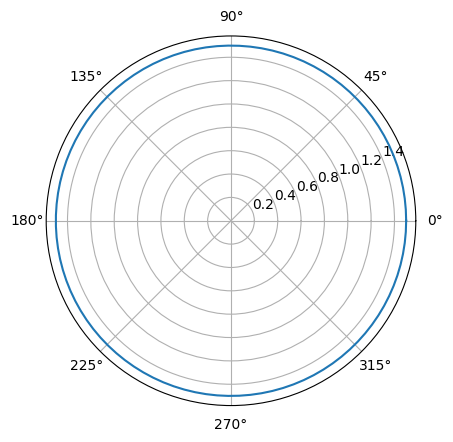

In [12]:
raw_mag = np.multiply(clark_transformed,clark_transformed)
raw_mag = np.sum(raw_mag,0)
raw_mag = np.sqrt(raw_mag)
teta = Vu.angular_frequency*t

alpha_polar = np.multiply(np.cos(teta),raw_mag).flat
beta_polar = np.multiply(np.sin(teta),raw_mag).flat

plt.polar(teta.flat,raw_mag.flat)

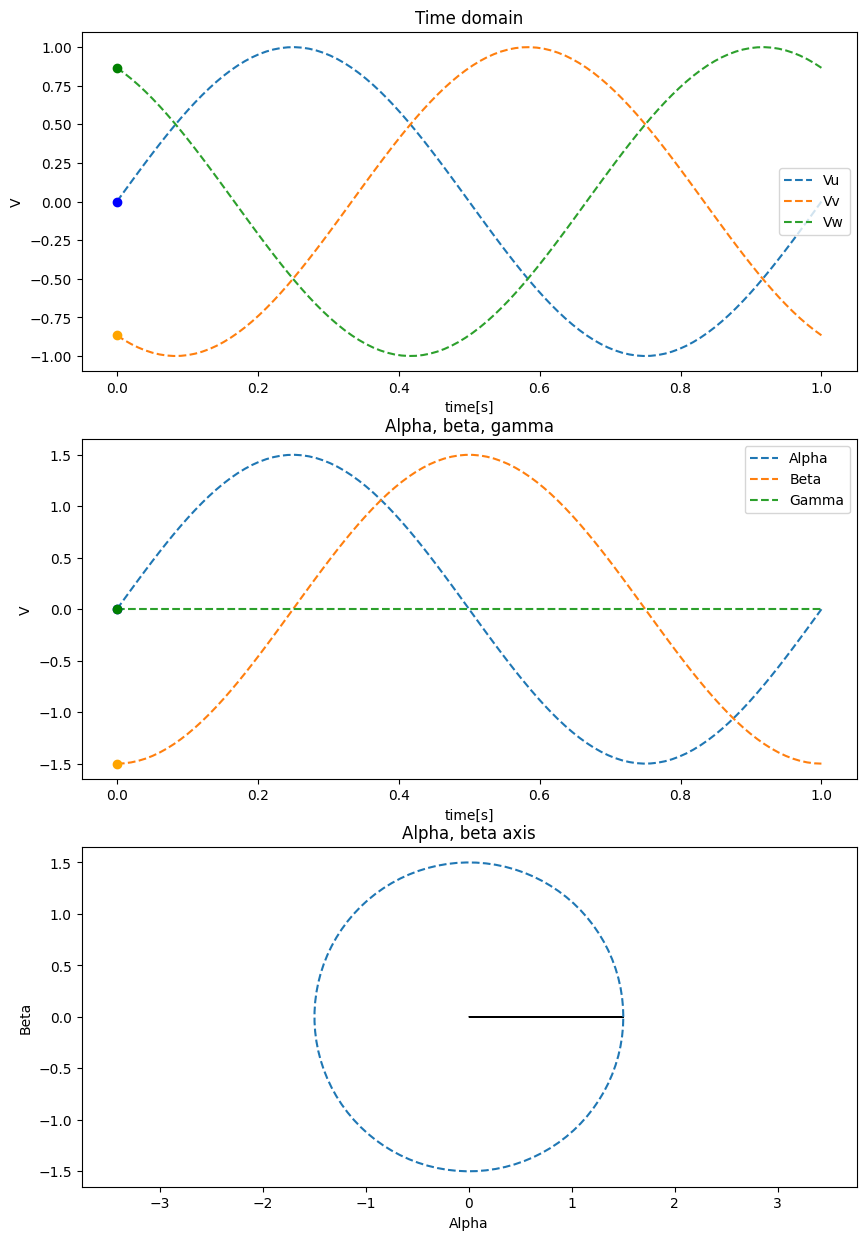

In [25]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
fig,axs = plt.subplots(3, figsize=(10,15))

axs[0].plot(t,Vu.out,"--",t,Vv.out,"--",t,Vw.out,"--")
u, = axs[0].plot(t[0],Vu.out[0],"bo")
v, =axs[0].plot(t[0],Vv.out[0],"o",color="orange")
w, = axs[0].plot(t[0],Vw.out[0],"go")


axs[0].set_xlabel("time[s]")
axs[0].set_ylabel("V")
axs[0].legend(["Vu","Vv","Vw"])
axs[0].set_title("Time domain")

axs[1].plot(t, alpha.flat,"--",t, beta.flat,"--",t, gamma.flat,"--")
al, = axs[1].plot(t[0],alpha.flat[0],"bo")
bet, =axs[1].plot(t[0],beta.flat[0],"o",color="orange")
gam, = axs[1].plot(t[0],gamma.flat[0],"go")


axs[1].set_xlabel("time[s]")
axs[1].set_ylabel("V")
axs[1].legend(["Alpha","Beta","Gamma"])
axs[1].set_title("Alpha, beta, gamma")

axs[2].plot(alpha_polar,beta_polar,"--")
polar = axs[2].arrow(0,0,alpha_polar[0],beta_polar[0])

axs[2].axis("equal")
axs[2].set_title("Alpha, beta axis")
axs[2].set_xlabel("Alpha")
axs[2].set_ylabel("Beta")


def animate(i):
    return[
        v.set_data(t[i],Vv.out[i]),u.set_data(t[i],Vu.out[i]),w.set_data(t[i],Vw.out[i]),
        al.set_data(t[i],alpha.flat[i]),
        bet.set_data(t[i],beta.flat[i]),
        gam.set_data(t[i],gamma.flat[i]),
        polar.set_data(x=0,y=0,dx=alpha_polar[i],dy=beta_polar[i])]

ani = FuncAnimation(fig, animate, frames=len(t), interval=200, repeat=False)
ani.save("media/alpha_beta.gif")

In [26]:
from IPython import display
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()